In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# 1. Tải dữ liệu
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# --- 1. GRADIENT BOOSTING ---
gb_model = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    # Số lượng cây: Cần cân đối với learning_rate
    'n_estimators': [100, 200, 300],
    
    # Tốc độ học: Thường 0.01, 0.05, 0.1 là các giá trị tiêu chuẩn
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    
    # Độ sâu cây: Với dữ liệu này, cây nông (3-5) thường tốt hơn cây sâu
    'max_depth': [3, 4, 5],
    
    # Stochastic Gradient Boosting: 
    # 1.0 = Dùng toàn bộ dữ liệu (Gradient Boosting thường)
    # 0.8 = Dùng 80% dữ liệu ngẫu nhiên mỗi vòng (Stochastic GB - Giảm overfitting tốt)
    'subsample': [0.8, 1.0],
    
    # Kiểm soát việc chia nhánh để tránh cây quá phức tạp
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None] # Tương tự Random Forest
}

print("Đang tối ưu hóa Gradient Boosting...")
grid_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)

print("GB Best Params:", grid_gb.best_params_)
print(f"GB Best Score: {grid_gb.best_score_:.4f}")
print("-" * 30)

Đang tối ưu hóa Gradient Boosting...
GB Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
GB Best Score: 0.9546
------------------------------


In [5]:
best_model_gb = grid_gb.best_estimator_
# Fit the best model on the training data

model_name = "GradientBoost"
y_pred_gb = best_model_gb.predict(X_test)

acc = accuracy_score(y_test, y_pred_gb)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred_gb))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred_gb, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy: {classification_report(y_test, y_pred_gb, output_dict=True)["accuracy"]:.4f}')


Độ chính xác (Accuracy) của GradientBoost: 94.64%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.67      0.50      0.57         4

    accuracy                           0.95        56
   macro avg       0.81      0.74      0.77        56
weighted avg       0.94      0.95      0.94        56

------------------------------
F1_Score: 0.9429
Accuracy: 0.9464


Exception ignored in: <function ResourceTracker.__del__ at 0x104a55e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x105999e40>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x102965e40>
Traceback (most recent call last

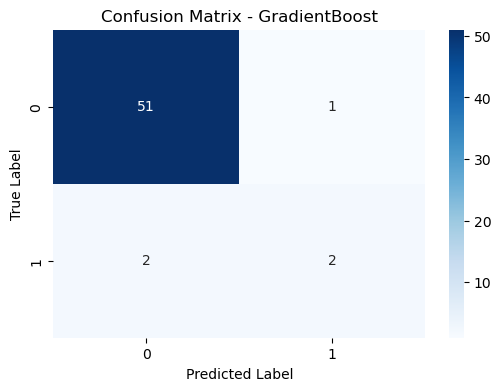

In [7]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()